<a href="https://colab.research.google.com/github/chr1s-b/m2r-fluids/blob/main/m2r_fluids_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make necessary imports:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Define difference equations:

In [5]:
def backward_euler(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (u[n, j+1] - u[n, j-1])


def upwind(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k/h) * (u[n, j+1] - u[n, j-1])


def lax_friedrichs(u, n, j, h, k):
    u[n+1, j] = (1/2) * (u[n, j-1] - u[n, j+1]) - (k / (2*h)) * (u[n, j+1] - u[n, j-1])


def lax_wendroff(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (u[n, j+1] - u[n, j-1]) + (k**2 / (2*h**2)) * (u[n, j+1] - 2*u[n, j] + u[n, j-1])


def beam_warming(u, n, j, h, k):
    u[n+1, j] = u[n, j] - (k / (2*h)) * (3*u[n, j] - 4*u[n, j-1] + u[n, j-2]) + (k**2 / (2*h**2)) * (u[n, j] - 2*u[n, j-1] + u[n, j-2])


Discretisation constants and final time to numerically solve for:

In [19]:
L = 100     # domain size
T = 0.5   # final time
h = 0.01    # mesh width
k = 0.5 * h # time step (wrt mesh ratio and h)
a = -L/2.   # lower bound
b = L/2.    # upper bound

Define initial condition:

In [20]:
def u_0(y: np.ndarray):
    """Define initial condition at t=0."""
    return np.where(y <= 0, 1.0, 0.0)

Choose a difference method to use:

In [21]:
difference_method = lax_wendroff

Numerically solve:

In [22]:
# create space for numerical solution

x = np.arange(a, b, h)
t = np.arange(0, T, k)

u = np.zeros((len(t), len(x)))

# apply initial condition
u[0] = u_0(x)

# numerically solve
for n in range(len(t)-1):
    for j in range(1, len(x)-1):
        difference_method(u, n, j, h, k)

Apply the analytic solution for comparison:

In [23]:
# apply analytic solution
exact_solution = np.zeros((len(t), len(x)))
for n in range(len(t)):
    exact_solution[n] = u_0(x - t[n])

Do plotting:

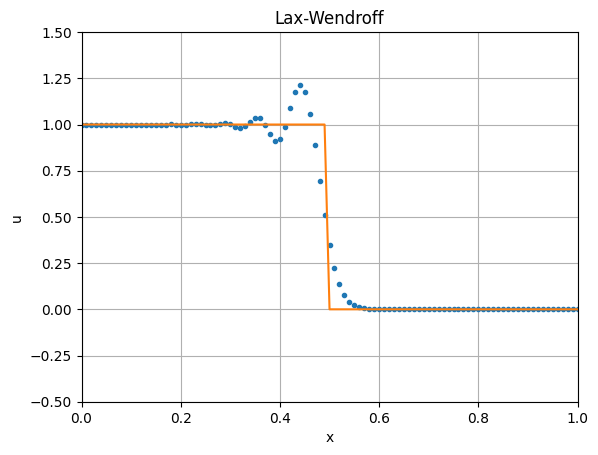

In [24]:
def method_to_name(method: callable) -> str:
    """Convert function to a name."""
    return method.__name__.replace("_", "-").title()


plt.title(f"{method_to_name(difference_method)}")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim([0, 1])
plt.ylim([-0.5, 1.5])
plt.plot(x, u[-1], '.')
plt.plot(x, exact_solution[-1])
plt.grid(True)
plt.show()